#Plot a vector field

First let's look at a simple vector field plot. It requires four parameters `x`, `y`, `dx` and `dy`, where `dx` and `dy` determine the endpoints of the arrows attached to the points with coordinates given in `x` and `y`.

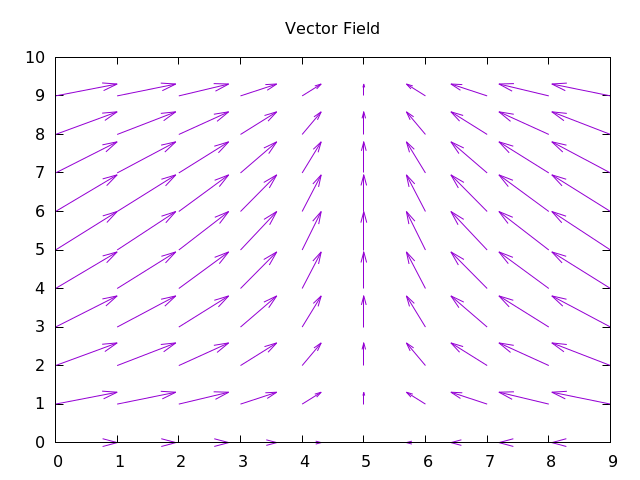

In [1]:
require 'gnuplotrb'
include GnuplotRB
include Math

x = Array.new(10) { (0..9).to_a }.flatten
y = (0..9).map { |i| Array.new(10) {i} }.flatten
dx = x.zip(y).map { |p| cos(p[0].to_f*PI/10.0) }
dy = x.zip(y).map { |p| sin(p[1].to_f*PI/10.0) }

vec_field = Plot.new([[x,y,dx,dy], with: 'vectors'], 
                     key: false, title: 'Vector Field')

vec_field.to_pngcairo('vec_field.png')
File.open('vec_field.png')

##Colored arrows

Now, color the arrows according to their slope.

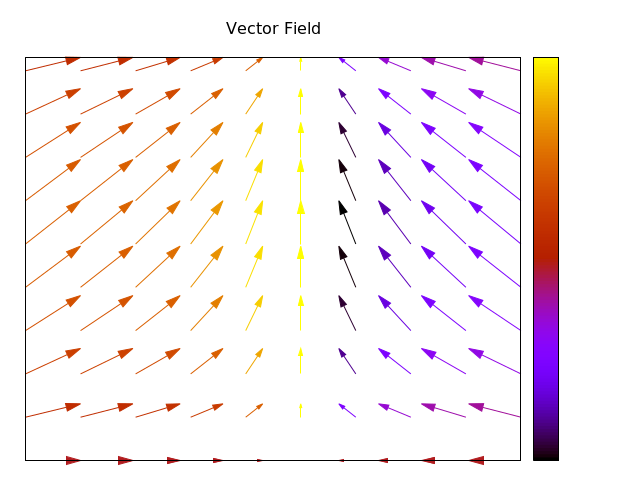

In [2]:
#the slopes of the vectors on the logistic scale
col = dx.zip(dy).map do |p| 
  p[0]==0 ? 1.0 : 1.0 / (1.0 + Math::exp(-p[1].to_f / p[0].to_f))
end

col_vec_field = Plot.new([[x,y,dx,dy,col], with: 'vectors', filled: true, lc: 'palette'],
                          key: false, tics: false, title: 'Vector Field')

col_vec_field.to_pngcairo('col_vec_field.png')
File.open('col_vec_field.png')
